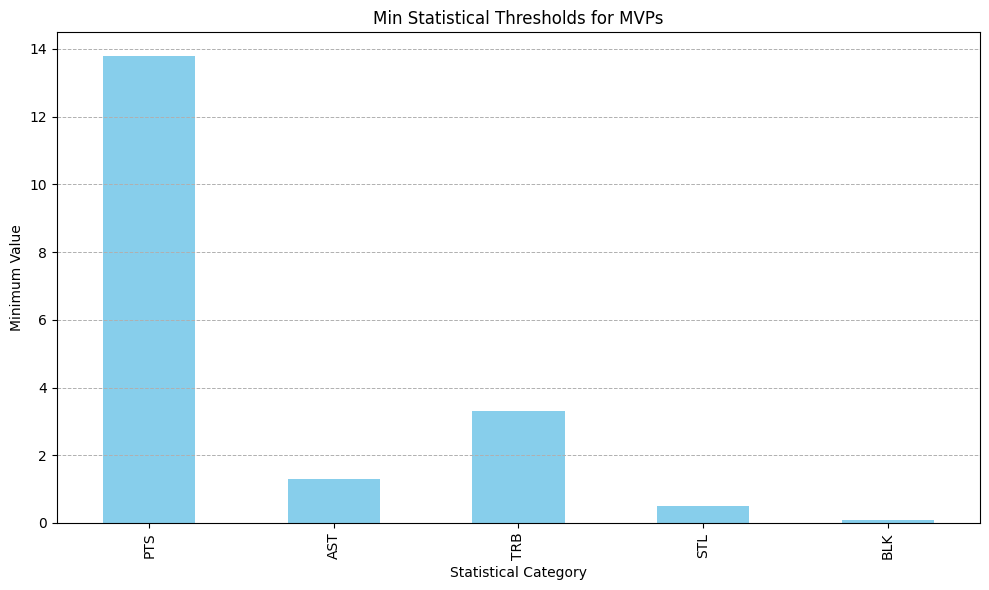

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the MVP data
mvp_data = pd.read_csv('../data/MVPdata.csv')

# Clean the data if necessary (e.g., converting data types)
mvp_data['PTS'] = pd.to_numeric(mvp_data['PTS'], errors='coerce')
mvp_data['AST'] = pd.to_numeric(mvp_data['AST'], errors='coerce')
mvp_data['TRB'] = pd.to_numeric(mvp_data['TRB'], errors='coerce')
mvp_data['STL'] = pd.to_numeric(mvp_data['STL'], errors='coerce')
mvp_data['BLK'] = pd.to_numeric(mvp_data['BLK'], errors='coerce')

# Calculate the minimum values for the main statistical categories for MVPs
mvp_min_stats = mvp_data[['PTS', 'AST', 'TRB', 'STL', 'BLK']].min()

# Plotting the results
plt.figure(figsize=(10, 6))
mvp_min_stats.plot(kind='bar', color='skyblue')
plt.title('Min Statistical Thresholds for MVPs')
plt.xlabel('Statistical Category')
plt.ylabel('Minimum Value')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

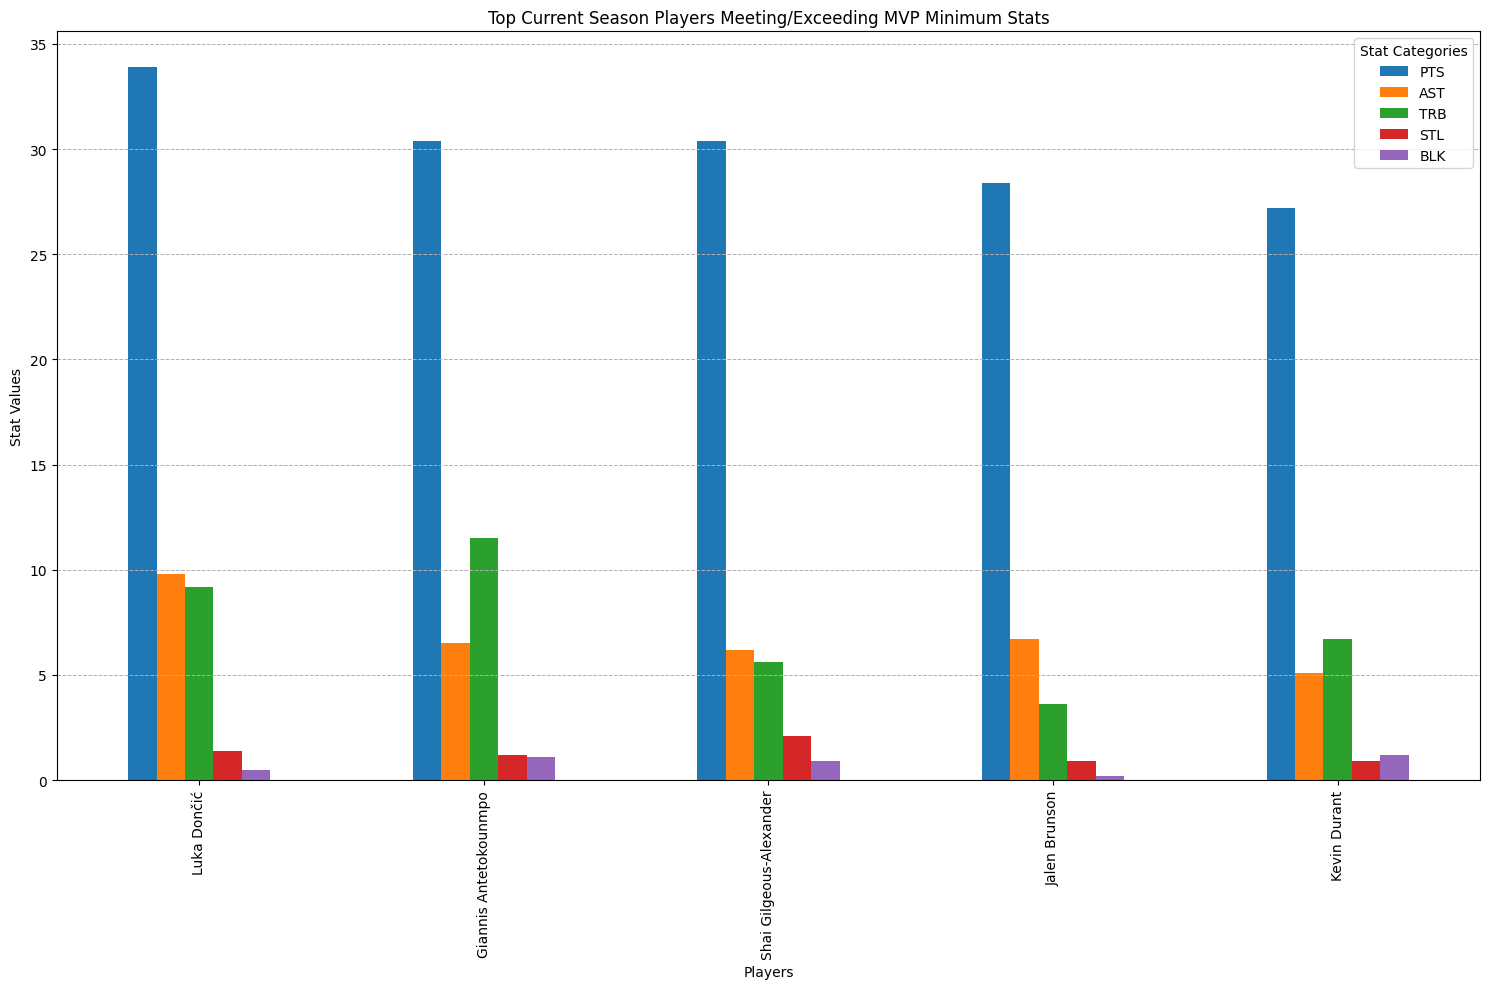

In [15]:
player_data = pd.read_csv('../data/currSeasonStatsNBA.csv')

mvp_min_stats = mvp_data[['PTS', 'AST', 'TRB', 'STL', 'BLK']].min()

# Filter current season players who meet or exceed the MVP minimum stats
qualified_players = player_data[
    (player_data['PTS'] >= mvp_min_stats['PTS']) &
    (player_data['AST'] >= mvp_min_stats['AST']) &
    (player_data['TRB'] >= mvp_min_stats['TRB']) &
    (player_data['STL'] >= mvp_min_stats['STL']) &
    (player_data['BLK'] >= mvp_min_stats['BLK'])
]

# Plotting the qualified players' stats in a bar graph
plt.figure(figsize=(15, 10))

# Get the top N players who exceed the MVP min stats in points as an example
top_players = qualified_players.nlargest(5, 'PTS')

# Create bar graph for each stat category
top_players.set_index('Player')[['PTS', 'AST', 'TRB', 'STL', 'BLK']].plot(kind='bar', figsize=(15, 10))

plt.title('Top Current Season Players Meeting/Exceeding MVP Minimum Stats')
plt.ylabel('Stat Values')
plt.xlabel('Players')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend(title='Stat Categories')
plt.tight_layout()
plt.show()
plt.show()
